<a href="https://colab.research.google.com/github/leonarddocchagas/data_science/blob/master/Explorando_dados_do_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="20%" src="https://github.com/leonarddocchagas/data_science/blob/master/projetos/_imagens/Titanic.png?raw=true" align="center">

## Análise dos Dados do Titanic

#### **Um pouco de história**

Em 2 de Abril de 1912 fica pronto o navio "Que nem Deus pode afundar!". Frase que ficou marcada na produção cinamatográfica de James Cameron. 

A história do Titanic realmente é incrível em todos os aspectos. Em seu tempo, era considerado a maior embarcação já criada e os números comprovam. Tinha 269 metros de comprimento, 28 metros de largura e 53 metros de altura. Operava com uma tripulação de 892 pessoas e podia transportar até 2.435 passageiros.


## Obtenção dos Dados

In [1]:
# importar bibiotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# redenrizar mapas
!pip install folium
import folium
from folium import plugins

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importa dados
df = pd.read_csv('https://bit.ly/2A6J2fm')

In [3]:
# exibi as 5 primeiras linhas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Dicionário de Dados**
* `PassengerId:` Número de identificação do passageiro
* `Survived:` Informa se o passageiro sobreviveu ao desastre
* 0 = Não
* 1 = Sim
* `Pclass:` Classe do bilhete
* 1 = 1ª Classe
* 2 = 2ª Classe
* 3 = 3ª Classe
* `Name:` Nome do passageiro
* `Sex:` Sexo do passageiro
* `Age:` Idade do passageiro
* `SibSp:` Quantidade de cônjuges e irmãos a bordo
* `Parch:` Quantidade de pais e filhos a bordo
* `Ticket:` Número da passagem
* `Fare:` Preço da Passagem
* `Cabin:` Número da cabine do passageiro
* `Embarked:` Porto no qual o passageiro embarcou
* C = Cherbourg
* Q = Queenstown
* S = Southampton

###**Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [4]:
df.shape

(891, 12)

In [5]:
# atributos e entradas
print('Atributos: {}' .format(df.shape[1]))
print('Entradas: {}\n ' .format(df.shape[0]))

display(df.dtypes)

Atributos: 12
Entradas: 891
 


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###**Valores ausentes**

In [6]:
# quantidade
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# percentual 
df.isnull().sum() / df.shape[1]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            14.750000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          57.250000
Embarked        0.166667
dtype: float64

#### **Tratando NaN (valores ausentes)**
É sempre importante atentar para valores (missing | faltantes | NaN) em nosso dataset. Em diversas análises, ausencia de informação causa falha ao nosso modelo. Em nosso caso, vamos apresentar a informação da localiação dos Embarques em forma de mapa e detectamos 2 valores ausentes na variável Embarked. Por se tratar de poucos registros, vamos eliminar essas duas entradas.  

In [8]:
# excluindo NaN da variável Embarked
df.dropna(subset=['Embarked'], inplace=True)

In [9]:
# exibido dataset depois do tratamento
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

### **Distribuição das variáveis**

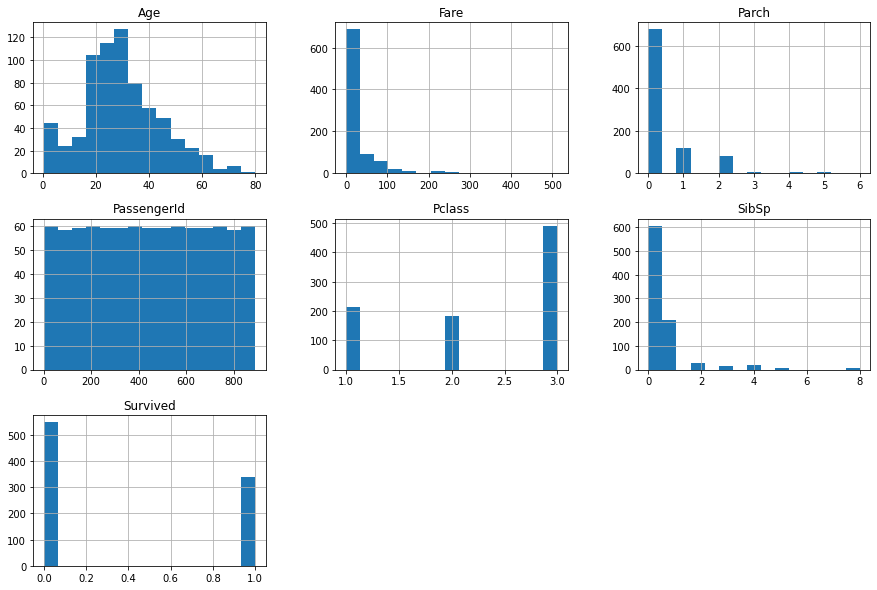

In [10]:
# densidade das variáveis
df.hist(bins=15, figsize=(15, 10));

Ao plotar todas as variáveis em busca de entender a densidade de cada uma, vimos que nem todas fazem sentido apresentar com histograma, como por exemplo `Passengerid`. Então vamos trazer apenas as que podemos nos informar algo. Como temos o dicioário de dados, é possível ser assertivos

In [11]:
# exibindo colunas dataset
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

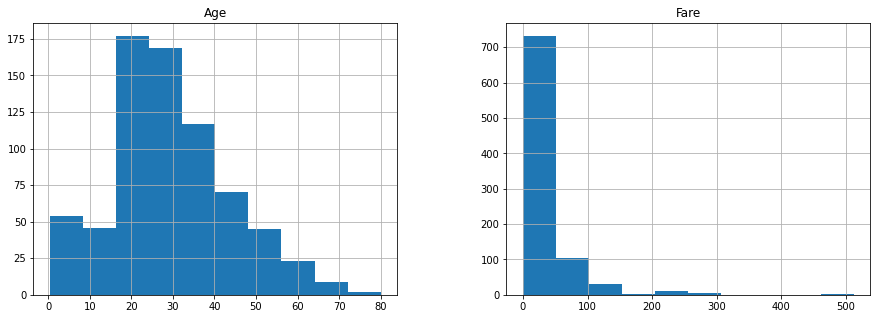

In [12]:
# exibindo histograma
df.filter(items = ['Age', 'Fare']).hist(bins=10, figsize=(15, 5));


Como conhecemos nosso dataset, escolhi as variáveis `Age` e `Fare` para entender melhor a densidade da informação. Histograma criado com as duas, foi possível identificar que `Fare` possui *outliers*. Precisamos ter bastante atenção, já que os outliers podem interfetir bastante no resultado. Então vamos investigar.

In [13]:
# estatistica variável Fare
df['Fare'].describe()

count    889.000000
mean      32.096681
std       49.697504
min        0.000000
25%        7.895800
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

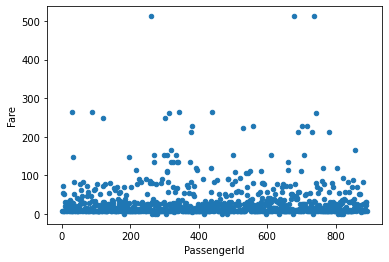

In [14]:
# dispersão da variável 
df.plot.scatter('PassengerId', 'Fare');

O scatter ajuda a entender bem como está a dispersão. Ficou claro que existe 3 entradas que estão bem fora do padrão. Agora é identificar os resgistros outlier. 

In [15]:
# listando os outliers
df[df['Fare'] >= 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Com os outliers encontrados cabe uma reflexão. Informação fora do padrão, não significa um erro. Até por que, o objetivo da análsie poderia ser justamente identificar essa anomalia. Então, o importante é entender bem os dados e saber bem o que está se buscando. 

### **Q2.Onde aconteceram os embarques?**

 Informações apresentadas em mapas sempre é interessante. Então com o objetivo de enrequecer a análise, vamos adiciona ao conjunto de dados as coordenadas de latitude e longitude, que foi extraida manualmente do Google. Extração manual não é a melhor forma,  mas como são apenas 3 portos, valeu o esforço. 

#### **Coordenadas:**
* Queenstown: 52.0267662,-9.5458724
* Southampton: 50.9052739,-1.4148693
* Cheargourg: 49.6374801,-1.6192302

In [16]:
# função latitude
def func_latitude(a):
  if a == 'C':
    return 49.6374801
  if a == 'S':
    return 50.9052739
  if a == 'Q':
    return 52.0267662


In [17]:
# função longitude
def func_longitude(a):
  if a == 'C':
    return -1.6192302
  if a == 'S':
    return -1.4148693
  if a == 'Q':
    return -9.5458724

In [18]:
# adiciona latitude e longitude ao dataset com a função map
df['Latitude'] = list(map(func_latitude, df['Embarked']))
df['Longitude'] = list(map(func_longitude, df['Embarked']))

In [19]:
# exibi dataset com as novas colunas
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Latitude,Longitude
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,50.905274,-1.414869
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,49.637480,-1.619230
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,50.905274,-1.414869
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,50.905274,-1.414869
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,50.905274,-1.414869


In [20]:
coordenadas=[]
for lat,lng in zip(df.Latitude, df.Longitude):
  coordenadas.append([lat,lng])

In [21]:
mapa = folium.Map(
    location=[50.7839624,-5.1200623], 
    zoom_start=7, 
    tiles='Stamen Toner'
    )

In [22]:
mapa.add_child(plugins.HeatMap(coordenadas))

####**Q3. Quantidade de sobreviventes**

## Após deversas análises estatisticas do nosso dataset, nos sentimos confiantes para investigar o que os dados falam sobre os passageiros diretamente.

Como para algumas visões, foi preciso utilizar técnicas como excluir valores NaN para plotar gráficos, com os de mapa por exemplo, vamos recarregar nosso dataset para ter a quantidade exata de passagueiros. Com essa novo, também vamos renomear e excluir algumas colunas.

In [23]:
# recarregando dataset com outro nome e exibindo os registros
df_completo = pd.read_csv('https://bit.ly/2A6J2fm')
df_completo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
# excluindo colunas
df_completo = df_completo.drop(columns=['Ticket', 'SibSp', 'Parch', 'Cabin'])
df_completo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


##**Sobre os passageiros**

**Quantidade geral**

In [25]:
# quantidade passageiros
print('O Titanic leva abordo {} passageiros' .format(df_completo['PassengerId'].shape[0]))

O Titanic leva abordo 891 passageiros


**Distribuição por classe**

In [26]:
# quantidade
df_completo.filter(items=['Pclass', 'PassengerId']).groupby('Pclass').count() 

,PassengerId
Pclass,
1,216
2,184
3,491


In [27]:
# percentual
df_completo.filter(items=['Pclass', 'PassengerId']).groupby('Pclass').count() / df_completo['PassengerId'].shape[0] * 100

,PassengerId
Pclass,
1,24.242424
2,20.650954
3,55.106622


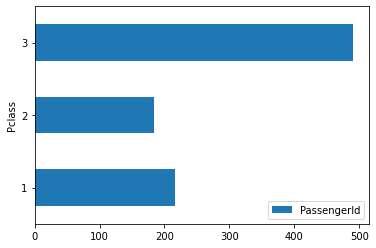

In [28]:
# visão gráfica
df_completo[['Pclass', 'PassengerId']].groupby('Pclass').count().plot(kind='barh');

Conclusão:

Vimos que a maioria estava lotada na 3 classe

**Por sexo**

In [29]:
df_completo.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Fare',
       'Embarked'],
      dtype='object')

In [30]:
# quantidade
df_completo[['Sex', 'PassengerId']].groupby('Sex').count()

,PassengerId
Sex,
female,314
male,577


In [31]:
# percentual
df_completo[['Sex', 'PassengerId']].groupby('Sex').count() / df_completo.shape[0] * 100

,PassengerId
Sex,
female,35.241302
male,64.758698


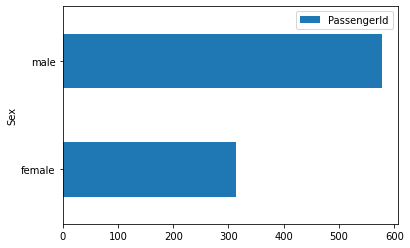

In [32]:
# visão gráfica
df_completo[['Sex', 'PassengerId']].groupby('Sex').count().plot.barh();

Conclusão:

Vimos que a maioria eram homens

#### A última etapa vamos focar na informação sobre sobreviventes e óbitos. Também vamos estar atentos a outras particularidades que surja pelo caminho.

In [33]:
# recarregando nosso dataset
df_completo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S


In [42]:
# detalhe geral e sobre sobreviventes e óbitos
print('Total Geral de Passageiros:')
print('Qtde. Abordo: {}' .format(df_completo.shape[0]))
print('Qtde. Mortos: {}' .format(df_completo[df_completo['Survived'] == 0].shape[0]))
print('Qtde. Sobreviventes: {}' .format(df_completo[df_completo['Survived'] == 1].shape[0]))


Total Geral de Passageiros:
Qtde. Abordo: 891
Qtde. Mortos: 549
Qtde. Sobreviventes: 342


In [52]:
# detalhe sobreviventes
df_completo[df_completo['Survived'] == 1].groupby('Sex').size()


Sex
female    233
male      109
dtype: int64

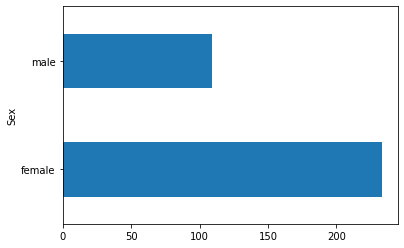

In [69]:
df_completo[df_completo['Survived'] == 1].groupby(by='Sex').size().plot.barh();

Conclusão:

Vimos que a máxima de "mulhres e criança primeiro" reflete nos números. A grande quantidade de sobreviventes foram entre as mulheres.

In [70]:
# distribuição de mortos por sexo
df_completo[df_completo['Survived'] == 0].groupby('Sex').size()

Sex
female     81
male      468
dtype: int64

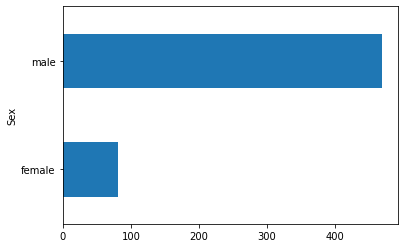

In [72]:
# visão gráfica
df_completo[df_completo['Survived'] == 0].groupby('Sex').size().plot.barh();

Conclusão:

Como fizemos o levantamento sobre os sobreviventes e a grande maioria eram mulheres, já imaginávamos que, o grande número de mortos estaria entre os homem.

#### Para encerrar a exploração, vamos apresentar uma cuiosidade. Entre os passageiros, existiam não pagantes.

In [73]:
# listagem dos não pagantes
df_completo[df_completo['Fare'] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0.0,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0.0,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0.0,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0.0,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0.0,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0.0,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0.0,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0.0,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0.0,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0.0,S


Dentre os não pagantes, apenas um sobreviveu. 

In [78]:
# único sobrevivente entre os não pagantes
df_completo.query('Fare == 0 & Survived == 1')

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0.0,S


# **Conclusão**

Podemos perceber que a grande maioria eram jovens. Provavelmente pessoas que iriam tentar a vida em Nova York. Vimos também que, a maioria dos sobreviventes foram as mulheres. 

Desastres como este são realmente chocantes. Tanta para quem vivenciou quanto para quem acompanha os fatos. Mas, são momentos assim que as normas de seguranças são intensificadas e recebem diversas melhorias. Um fator determinando para grande quantidade de mortos, foi não existir botes suficientes para todos. Lamentável.   